## MinMaxScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.DataFrame(
    {
        "Age": [22, 23, 24, 25, 26, 27, 28, 29, 30] ,
        "Salary":  [12000, 11000, 18000, 17000, 15000, 16000, 20000, 25000, 30000]
    }
)

df

,Age,Salary
0,22,12000
1,23,11000
2,24,18000
3,25,17000
4,26,15000
5,27,16000
6,28,20000
7,29,25000
8,30,30000


In [3]:
df.describe()  # min and max are not equal

,Age,Salary
count,9.000000,9.000000
mean,26.000000,18222.222222
std,2.738613,6078.194176
min,22.000000,11000.000000
25%,24.000000,15000.000000
50%,26.000000,17000.000000
75%,28.000000,20000.000000
max,30.000000,30000.000000


In [4]:
scaler = MinMaxScaler().fit(df)

In [5]:
print(scaler.data_min_)
print(scaler.data_max_)

[   22. 11000.]
[   30. 30000.]


In [9]:
scaled_data = scaler.transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=['Age','Salary'])
scaled_df

,Age,Salary
0,0.000,0.052632
1,0.125,0.000000
2,0.250,0.368421
3,0.375,0.315789
4,0.500,0.210526
5,0.625,0.263158
6,0.750,0.473684
7,0.875,0.736842
8,1.000,1.000000


In [10]:
scaled_df.describe() # now min and max are equal

,Age,Salary
count,9.000000,9.000000
mean,0.500000,0.380117
std,0.342327,0.319905
min,0.000000,0.000000
25%,0.250000,0.210526
50%,0.500000,0.315789
75%,0.750000,0.473684
max,1.000000,1.000000


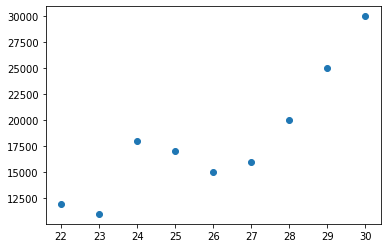

In [11]:
plt.scatter(df['Age'], df['Salary']);

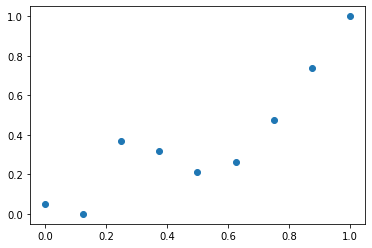

In [12]:
plt.scatter(scaled_df['Age'], scaled_df['Salary']);

In [13]:
scaler2 = MinMaxScaler((1,3)) # feature_range >> (min, max), default=(0, 1)
print(scaler2.fit(df))

MinMaxScaler(feature_range=(1, 3))


In [14]:
scaled_data2 = scaler2.transform(df)
scaled_df2 = pd.DataFrame(scaled_data2, columns=['Age','Salary'])
scaled_df2

,Age,Salary
0,1.00,1.105263
1,1.25,1.000000
2,1.50,1.736842
3,1.75,1.631579
4,2.00,1.421053
5,2.25,1.526316
6,2.50,1.947368
7,2.75,2.473684
8,3.00,3.000000


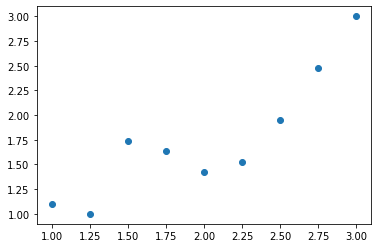

In [15]:
plt.scatter(scaled_df2['Age'], scaled_df2['Salary']);

## Standardization (z-score normalization)
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)

In [17]:
standarizes_data = scaler.fit_transform(df)
standarizes_data = pd.DataFrame(standarizes_data, columns=['Age','Salary'])
standarizes_data

,Age,Salary
0,-1.549193,-1.085793
1,-1.161895,-1.260296
2,-0.774597,-0.038778
3,-0.387298,-0.213281
4,0.000000,-0.562286
5,0.387298,-0.387783
6,0.774597,0.310227
7,1.161895,1.182739
8,1.549193,2.055252


In [18]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
standarizes_data.describe() # now mean = 0, std = 1

,Age,Salary
count,9.000,9.000
mean,0.000,-0.000
std,1.061,1.061
min,-1.549,-1.260
25%,-0.775,-0.562
50%,0.000,-0.213
75%,0.775,0.310
max,1.549,2.055


In [19]:
print(scaler.mean_)

[   26.         18222.22222222]


In [20]:
print(scaler.var_)

[6.66666667e+00 3.28395062e+07]


In [21]:
print(scaler.var_[0])
print(scaler.var_[1])

6.666666666666667
32839506.172839507


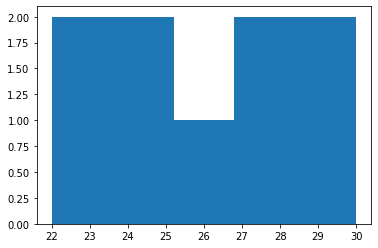

In [22]:
plt.hist(df['Age'], bins= 5);

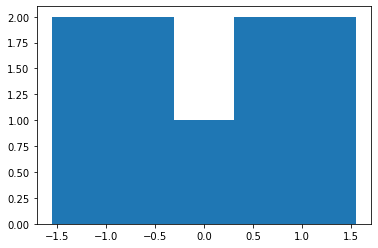

In [23]:
plt.hist(standarizes_data['Age'], bins= 5);

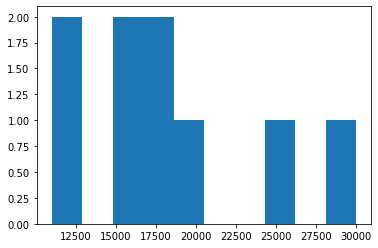

In [24]:
plt.hist(df['Salary']);

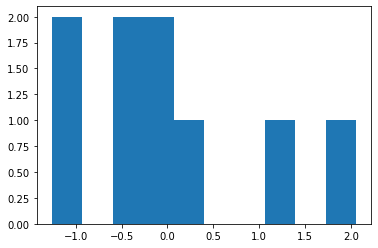

In [25]:
plt.hist(standarizes_data['Salary']);

## Binning

In [26]:
age_lst = [10, 15, 16, 18, 20, 30, 35, 42, 48, 50, 52, 55]

print('min = ', min(age_lst), 'max = ', max(age_lst))

x = 4

print((max(age_lst) - min(age_lst)) / x)

min =  10 max =  55
11.25


### 1- Equal Width Binning

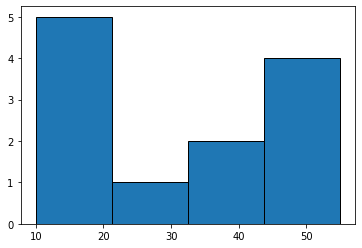

In [28]:
plt.hist(age_lst, bins = 4,  edgecolor="black");
# bin= (max value of data – min value of data) / total number of bins 

### 2- Equal Frequency Binning

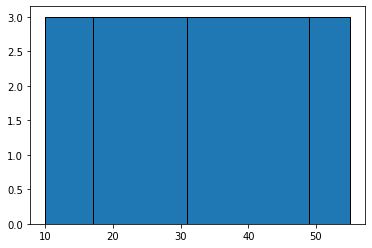

In [30]:
plt.hist(age_lst, bins = [10, 17, 31, 49, 55],  edgecolor="black");

## Encoding

### 1- Label Encoding
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [31]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(
    ["paris", "paris", "tokyo", "amsterdam"]
)

list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [34]:
le.transform(
    ["tokyo", "tokyo", "paris", "amsterdam"]
)

array([2, 2, 1, 0])

In [35]:
list(le.inverse_transform([2, 2, 1, 0]))

['tokyo', 'tokyo', 'paris', 'amsterdam']

### 2- Ordinal Encoding
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [36]:
from sklearn.preprocessing import OrdinalEncoder

Or_df = pd.DataFrame({
    "Evaluation": ["Poor", "Good", "Very Good", "Excellent"]}
)

Or_df.head()

,Evaluation
0,Poor
1,Good
2,Very Good
3,Excellent


In [37]:
Or_enc = OrdinalEncoder(categories = [["Poor", "Good", "Very Good", "Excellent"]])

Or_enc.fit(Or_df)
Or_enc.categories_

[array(['Poor', 'Good', 'Very Good', 'Excellent'], dtype=object)]

In [38]:
Or_data = Or_enc.transform(Or_df)
Or_df2 = pd.DataFrame(Or_data, columns = ["Evaluation"])
Or_df2

,Evaluation
0,0.000
1,1.000
2,2.000
3,3.000


### 3- One Hot Encoding
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [39]:
from sklearn.preprocessing import OneHotEncoder
oh_df = pd.DataFrame({"Item_Color":  ['Red', 'Green', 'Blue', 'Blue']})
oh_df.head()

,Item_Color
0,Red
1,Green
2,Blue
3,Blue


In [41]:
oh_enc = OneHotEncoder(handle_unknown='ignore')

oh_enc.fit(oh_df)

oh_enc.categories_

[array(['Blue', 'Green', 'Red'], dtype=object)]

In [50]:
oh_data = oh_enc.transform(oh_df).toarray()

oh_data

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [51]:
oh_df2 = pd.DataFrame(oh_data, columns = oh_enc.categories_)
oh_df2.head()

,Blue,Green,Red
0,0.000,0.000,1.000
1,0.000,1.000,0.000
2,1.000,0.000,0.000
3,1.000,0.000,0.000


### 4- Frequency Encoding

In [52]:
Fr_df = pd.DataFrame({"Item_Color":  ['Red', 'Green', 'Green', 'Blue', 'Blue', 'Blue']})
Fr_df.head(6)

,Item_Color
0,Red
1,Green
2,Green
3,Blue
4,Blue
5,Blue


In [53]:
color_freq = Fr_df.groupby('Item_Color').size() / len(Fr_df)
Fr_df['Freq_encoding'] = Fr_df['Item_Color'].apply(lambda x : color_freq[x])
Fr_df

,Item_Color,Freq_encoding
0,Red,0.167
1,Green,0.333
2,Green,0.333
3,Blue,0.500
4,Blue,0.500
5,Blue,0.500


### 5- Binary Encoding

In [54]:
bi_df = pd.DataFrame({"Item_Color": ['Red', 'Green', 'Pink', 'Green', 'Blue', 'Red', 'Blue', 'Green', 'Blue']})
bi_df

,Item_Color
0,Red
1,Green
2,Pink
3,Green
4,Blue
5,Red
6,Blue
7,Green
8,Blue


In [55]:
# pip install category_encoders
import category_encoders as ce

In [57]:
ce.BinaryEncoder().fit(bi_df)

BinaryEncoder(cols=['Item_Color'],
              mapping=[{'col': 'Item_Color',
                        'mapping':     Item_Color_0  Item_Color_1  Item_Color_2
 1             0             0             1
 2             0             1             0
 3             0             1             1
 4             1             0             0
-1             0             0             0
-2             0             0             0}])

In [58]:
bi_enc = ce.BinaryEncoder().fit_transform(bi_df)
bi_enc

,Item_Color_0,Item_Color_1,Item_Color_2
0,0,0,1
1,0,1,0
2,0,1,1
3,0,1,0
4,1,0,0
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0


In [59]:
bi_df2 = pd.concat([bi_df, bi_enc], axis=1)
bi_df2

,Item_Color,Item_Color_0,Item_Color_1,Item_Color_2
0,Red,0,0,1
1,Green,0,1,0
2,Pink,0,1,1
3,Green,0,1,0
4,Blue,1,0,0
5,Red,0,0,1
6,Blue,1,0,0
7,Green,0,1,0
8,Blue,1,0,0


### 6- Target Mean encoding

In [60]:
tm_df = pd.DataFrame({"Item_Color": ['Red', 'Green', 'Red', 'Green', 'Blue', 'Red',
                                     'Red', 'Blue', 'Red','Blue', 'Blue', 'Green'],
                     "Target": [1, 1, 0, 0, 1, 0, 1, 0, 1,0, 1,1] })
tm_df

,Item_Color,Target
0,Red,1
1,Green,1
2,Red,0
3,Green,0
4,Blue,1
5,Red,0
6,Red,1
7,Blue,0
8,Red,1
9,Blue,0


In [62]:
Target_Mean = tm_df["Item_Color"]
Target_Mean
color_freq = tm_df.groupby('Item_Color').size() / len(tm_df)
color_freq
Fr_df['Freq_encoding'] = Fr_df['Item_Color'].apply(lambda x : color_freq[x])
Fr_df

,Item_Color,Freq_encoding
0,Red,0.417
1,Green,0.250
2,Green,0.250
3,Blue,0.333
4,Blue,0.333
5,Blue,0.333
